In [82]:
#! /usr/bin/python
# -*- coding: utf-8 -*-

from __future__ import division
import os
import sys
import pandas as pd
import numpy as np
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

In [83]:
BASE_DIR = os.path.abspath(os.path.dirname('p'))
pd.__version__

u'0.24.2'

In [84]:
if pd.__version__ == '0.25.1':
    error_data5 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheet_name='19_5')
    error_data6 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheet_name='19_6')
    error_data7 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheet_name='19_7')
    error_data8 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheet_name='19_8')
    error_data9 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheet_name='19_9')
else:
    error_data5 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheetname='19_5')
    error_data6 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheetname='19_6')
    error_data7 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheetname='19_7')
    error_data8 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheetname='19_8')
    error_data9 = pd.read_excel(BASE_DIR + '\data/5_9error.xlsx', sheetname='19_9')
error_df_list = [error_data5, error_data6, error_data7, error_data8, error_data9]

error_data = pd.concat([error_data5, error_data6, error_data7, error_data8, error_data9]).reset_index(drop=True)
error_data.head()

,part_name,date,actual,predict,error,origin_predict
0,40165801521-999,2019-05-01,78,97,0.243590,96.893944
1,411350JN30A-999,2019-05-01,74,68,0.081081,68.067413
2,411720JD00C-999,2019-05-01,39,48,0.230769,48.009594
3,411720JG30B-999,2019-05-01,113,104,0.079646,104.456207
4,411950JN30A-999,2019-05-01,80,70,0.125000,70.469727


In [85]:
if pd.__version__ == '0.25.1':
    predict_data = pd.read_excel(BASE_DIR + '\data/10_predict.xlsx', sheet_name='Sheet1')
else:
    predict_data = pd.read_excel(BASE_DIR + '\data/10_predict.xlsx', sheetname='Sheet1')
predict_data.head()
for i in set(predict_data['part_name']):
    if i not in set(error_data['part_name']):
        predict_data = predict_data[predict_data['part_name']!=i]
predict_data.reset_index(inplace=True, drop=True)

In [86]:
if pd.__version__ == '0.25.1':
    part_data = pd.read_excel(BASE_DIR + '\data/month_data.xlsx', sheet_name='Sheet2')
else:
    part_data = pd.read_excel(BASE_DIR + '\data/month_data.xlsx', sheetname='Sheet2')
part_data.head()

,part_name,part_nm_chn,part_class_name,part_type,acc,SC,DC,series,vehicle,part_flow_abc,part_price_abc,is_new,supplier_type,min_order_num,supplier_communication_time,delivery_time,central_library,shelf_time,order_frequency,delivery_frequency
0,40165801521-999,堵塞,非易损件,MEDIUM,N,其他零部件(机械类),螺钉，螺栓，胶钉,28,新奇骏,GL-S-E,GL-C-I,N,海外,1,3,39,4180,1,D,D
1,411350JN30A-999,扭杆,非易损件,MEDIUM,N,其他零部件(机械类),车架，地板骨架，支架,8,天籁,GL-S-E,GL-C-D,N,海外,1,3,48,4181,1,D,D
2,411720JD00C-999,风扇及交流发电机皮带,一般易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,聚酯V型皮带,7,逍客,GL-S-E,GL-C-E,N,海外,1,3,48,4181,1,D,D
3,411720JG30B-999,风扇及交流发电机皮带,一般易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,聚酯V型皮带,9,奇骏,GL-S-D,GL-C-E,N,海外,1,3,48,4181,1,D,D
4,411950JN30A-999,皮带-动力转向油泵,常用易损件,MEDIUM,N,SSPI（主要维护件包括定期更换件）,聚酯V型皮带,8,天籁,GL-S-E,GL-C-F,N,海外,1,3,48,4181,1,D,D


In [ ]:
error_data['error_num'] = error

In [87]:
split_df = error_data.loc[:, ['part_name', 'actual']]
split_df.head()

,part_name,actual
0,40165801521-999,78
1,411350JN30A-999,74
2,411720JD00C-999,39
3,411720JG30B-999,113
4,411950JN30A-999,80


In [88]:
num_list = split_df.groupby('part_name')['actual'].mean()

num_split = pd.qcut(num_list, 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
num_split_df = num_split.to_frame()
num_split_df.reset_index(inplace=True)
num_split_df.rename(columns = {'actual': 'sold_num_type'}, inplace=True)
num_split_df['sold_num_type'] = pd.to_numeric(num_split_df['sold_num_type'])
num_split_df.info()
part_data = pd.merge(part_data, num_split_df, on='part_name')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
part_name        283 non-null object
sold_num_type    283 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


In [89]:
error_data_temp = error_data.drop('actual', axis=1)
error_data_temp.head()

,part_name,date,predict,error,origin_predict
0,40165801521-999,2019-05-01,97,0.243590,96.893944
1,411350JN30A-999,2019-05-01,68,0.081081,68.067413
2,411720JD00C-999,2019-05-01,48,0.230769,48.009594
3,411720JG30B-999,2019-05-01,104,0.079646,104.456207
4,411950JN30A-999,2019-05-01,70,0.125000,70.469727


In [90]:
all_data = pd.merge(error_data_temp, part_data, on='part_name', how='left')
all_data.head()
predict_data10 = pd.merge(predict_data, part_data, on='part_name', how='left')

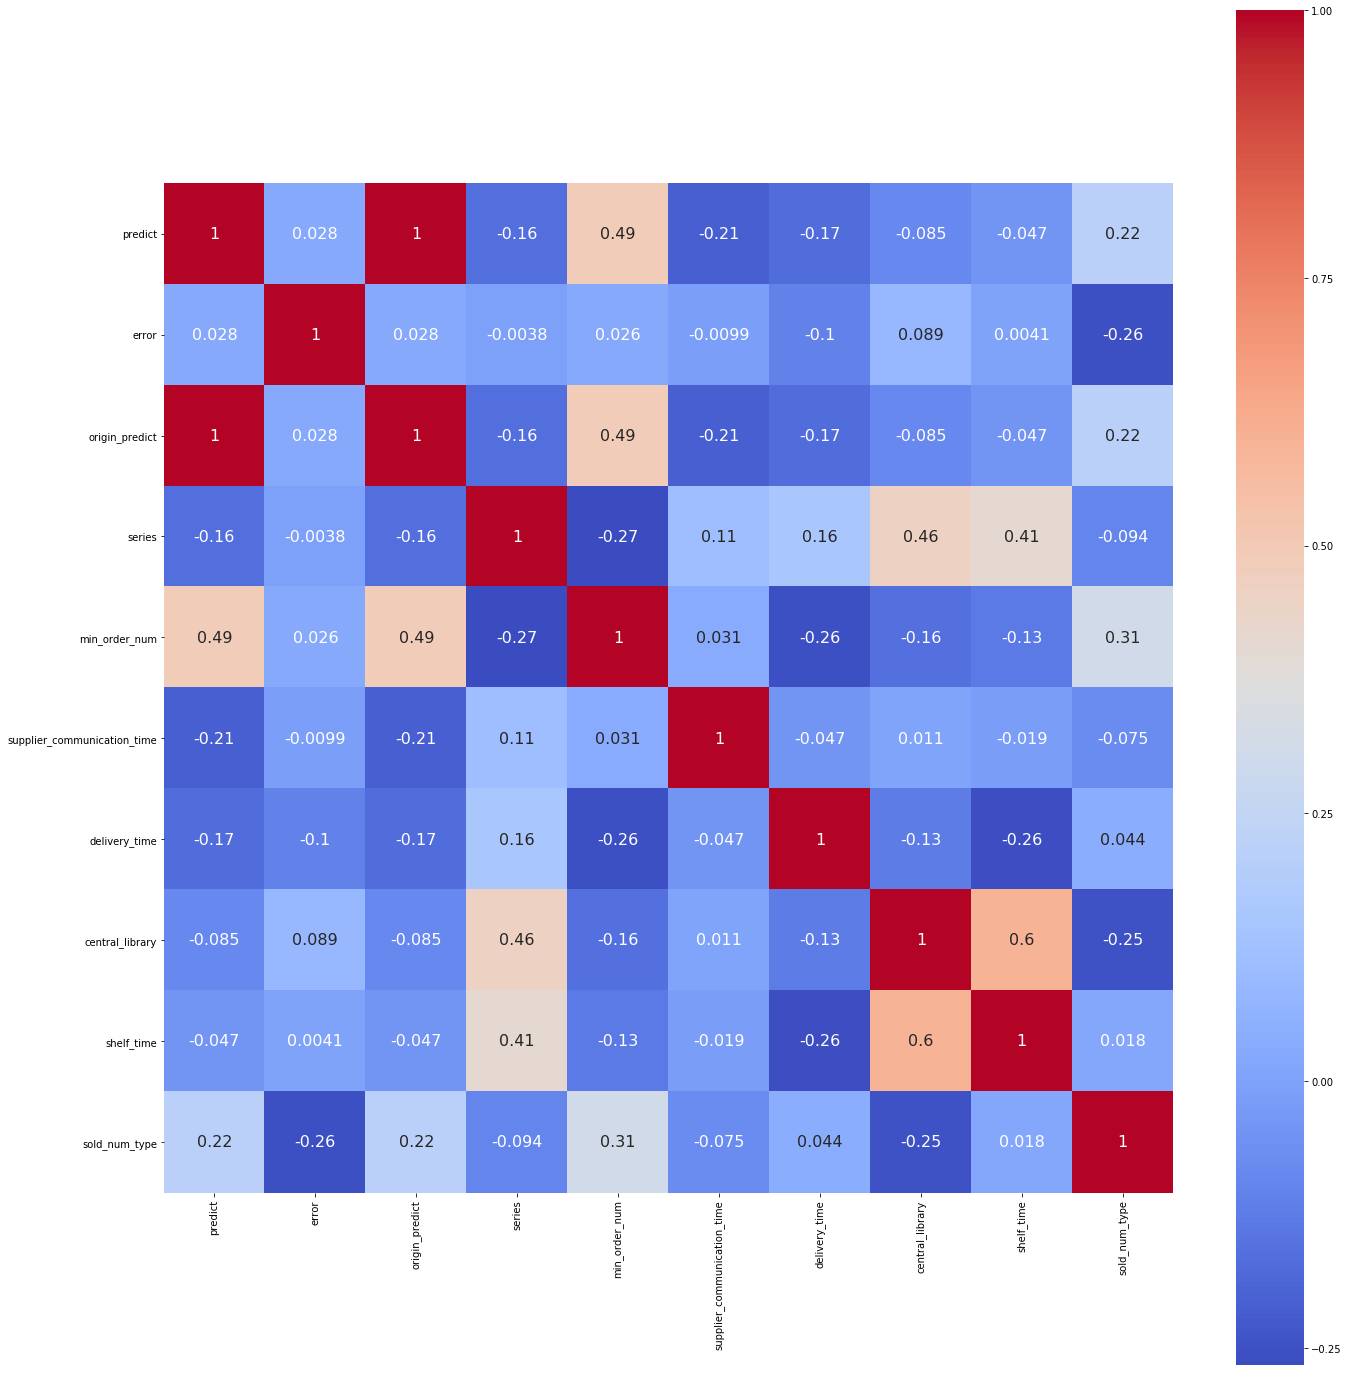

In [91]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

# fig = plt.subplots(figsize=(20, 20))

# sns.heatmap(all_data.drop(['part_name'], axis=1).corr(), annot=True, square=True, cmap='coolwarm',
#             annot_kws={'size': 16})

# plt.tight_layout()
# plt.show()

In [92]:
all_data['month'] = all_data.apply(lambda x: x.date.month, axis=1)
predict_data10['month'] = 10

In [93]:
drop_columns = ['date', 'predict', 'part_nm_chn', 'is_new', 'SC', 'DC']
all_data.drop(drop_columns, axis=1, inplace=True)
predict_data10.drop(drop_columns, axis=1, inplace=True)
all_data.head()

,part_name,error,origin_predict,part_class_name,part_type,acc,series,vehicle,part_flow_abc,part_price_abc,supplier_type,min_order_num,supplier_communication_time,delivery_time,central_library,shelf_time,order_frequency,delivery_frequency,sold_num_type,month
0,40165801521-999,0.243590,96.893944,非易损件,MEDIUM,N,28,新奇骏,GL-S-E,GL-C-I,海外,1,3,39,4180,1,D,D,6,5
1,411350JN30A-999,0.081081,68.067413,非易损件,MEDIUM,N,8,天籁,GL-S-E,GL-C-D,海外,1,3,48,4181,1,D,D,5,5
2,411720JD00C-999,0.230769,48.009594,一般易损件,MEDIUM,N,7,逍客,GL-S-E,GL-C-E,海外,1,3,48,4181,1,D,D,4,5
3,411720JG30B-999,0.079646,104.456207,一般易损件,MEDIUM,N,9,奇骏,GL-S-D,GL-C-E,海外,1,3,48,4181,1,D,D,7,5
4,411950JN30A-999,0.125000,70.469727,常用易损件,MEDIUM,N,8,天籁,GL-S-E,GL-C-F,海外,1,3,48,4181,1,D,D,5,5


In [94]:
part_df = part_data.loc[:, ['part_name']]
part_dict = part_df.to_dict()['part_name']
part_df['part_no'] = part_df.index
part_dict_f = part_df.set_index(['part_name'])['part_no'].to_dict()
part_dict

{0L: u'40165801521-999',
 1L: u'411350JN30A-999',
 2L: u'411720JD00C-999',
 3L: u'411720JG30B-999',
 4L: u'411950JN30A-999',
 5L: u'4147355RF0A-B010',
 6L: u'41520800Q1E-999',
 7L: u'4152089E01A-999',
 8L: u'4165461LK0E-999',
 9L: u'4165463KY0B-999',
 10L: u'4180022FJ0A-B145',
 11L: u'420651JG30A-999',
 12L: u'4214001DA0A-B010',
 13L: u'4214104CL0A-B010',
 14L: u'421460CJ00A-B010',
 15L: u'421460EW80A-B010',
 16L: u'42160650X0B-C190',
 17L: u'421710ED000-999',
 18L: u'422401JA01B-999',
 19L: u'422401JD01B-999',
 20L: u'4226A03BR0A-999',
 21L: u'4240113RA0B-B119',
 22L: u'4240114CL0B-B119',
 23L: u'4240114CL1A-B119',
 24L: u'4240115MD0A-B119',
 25L: u'4240115MD3A-B119',
 26L: u'4240116FV1A-B119',
 27L: u'4240117FK1A-B119',
 28L: u'4240124CL0B-B119',
 29L: u'4240126FV2A-B119',
 30L: u'4240144CL0A-B119',
 31L: u'424014DF30B-B119',
 32L: u'4240234CL0B-B119',
 33L: u'4240236FV1C-B119',
 34L: u'4240236FV1D-B119',
 35L: u'424023DF30B-B119',
 36L: u'424023DF30D-B119',
 37L: u'4240336FV1A-B119'

In [95]:
all_data['part_name'].replace(part_dict_f, inplace=True)
predict_data10['part_name'].replace(part_dict_f, inplace=True)
all_data.head()

,part_name,error,origin_predict,part_class_name,part_type,acc,series,vehicle,part_flow_abc,part_price_abc,supplier_type,min_order_num,supplier_communication_time,delivery_time,central_library,shelf_time,order_frequency,delivery_frequency,sold_num_type,month
0,0,0.243590,96.893944,非易损件,MEDIUM,N,28,新奇骏,GL-S-E,GL-C-I,海外,1,3,39,4180,1,D,D,6,5
1,1,0.081081,68.067413,非易损件,MEDIUM,N,8,天籁,GL-S-E,GL-C-D,海外,1,3,48,4181,1,D,D,5,5
2,2,0.230769,48.009594,一般易损件,MEDIUM,N,7,逍客,GL-S-E,GL-C-E,海外,1,3,48,4181,1,D,D,4,5
3,3,0.079646,104.456207,一般易损件,MEDIUM,N,9,奇骏,GL-S-D,GL-C-E,海外,1,3,48,4181,1,D,D,7,5
4,4,0.125000,70.469727,常用易损件,MEDIUM,N,8,天籁,GL-S-E,GL-C-F,海外,1,3,48,4181,1,D,D,5,5


In [96]:
one_hot_feature = ['part_class_name', 'part_type', 'acc', 
                   'vehicle', 'part_flow_abc', 'part_price_abc', 'supplier_type', 
                   'order_frequency', 'delivery_frequency']

In [97]:
all_data_ready = deepcopy(all_data)
predict_data_ready = deepcopy(predict_data10)
for col in one_hot_feature:
    all_data_ready = all_data_ready.join(pd.get_dummies(all_data_ready[[col]]))
    predict_data_ready = predict_data_ready.join(pd.get_dummies(predict_data_ready[[col]]))

In [98]:
all_data_ready.drop(columns=one_hot_feature, inplace=True)
predict_data_ready.drop(columns=one_hot_feature, inplace=True)
predict_data_ready.drop(columns=['actual'], inplace=True)

In [99]:
all_data_ready.head()

,part_name,error,origin_predict,series,min_order_num,supplier_communication_time,delivery_time,central_library,shelf_time,sold_num_type,...,supplier_type_海外,supplier_type_自制,order_frequency_D,order_frequency_M1,order_frequency_T,order_frequency_W1,delivery_frequency_D,delivery_frequency_M1,delivery_frequency_T,delivery_frequency_W1
0,0,0.243590,96.893944,28,1,3,39,4180,1,6,...,1,0,1,0,0,0,1,0,0,0
1,1,0.081081,68.067413,8,1,3,48,4181,1,5,...,1,0,1,0,0,0,1,0,0,0
2,2,0.230769,48.009594,7,1,3,48,4181,1,4,...,1,0,1,0,0,0,1,0,0,0
3,3,0.079646,104.456207,9,1,3,48,4181,1,7,...,1,0,1,0,0,0,1,0,0,0
4,4,0.125000,70.469727,8,1,3,48,4181,1,5,...,1,0,1,0,0,0,1,0,0,0


In [101]:
from itertools import combinations
month_list = [5, 6, 7, 8, 9]
month_get_list1 = list(combinations(month_list, 1))
month_get_list2 = list(combinations(month_list, 2))
print(month_get_list1, month_get_list2)

([(5,), (6,), (7,), (8,), (9,)], [(5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)])


In [118]:
import xgboost as xgb
feature_list = list(predict_data_ready.columns)
pred_dfs1 = pd.DataFrame()
for com in month_get_list2:
    train_data = all_data_ready[~all_data_ready['month'].isin(com)].reset_index(drop=True)
    test_data = all_data_ready[all_data_ready['month'].isin(com)].reset_index(drop=True)
    
    train_x = train_data.loc[:, feature_list]
    train_y = train_data.loc[:, 'error']
    test_x = test_data.loc[:, feature_list]
    test_y = test_data.loc[:, 'error']
    print len(test_x)
    
    dtrain = xgb.DMatrix(train_x, train_y)
    dtest = xgb.DMatrix(test_x, test_y)
    params = {
    'eta':0.1,
    'max_depth':8,
    'min_child_weight':3,
    'gamma':0.1,
    'subsample':.8,
    'colsample_bytree':.7,
    'reg_alpha':1,
#     'objective':'reg:gamma'
}
    watchlist = [(dtrain,'train'),(dtest,'test')]
    xgb_model = xgb.train(params=params,dtrain=dtrain,num_boost_round=1000,early_stopping_rounds=100,evals=watchlist)
    dpredict = xgb.DMatrix(predict_data_ready)
    pred = xgb_model.predict(dpredict)
    pred_df = pd.DataFrame(pred, columns=['error_pred_{}'.format(com)])
    pred_dfs1 = pd.concat([pred_dfs1, pred_df], axis=1)

    pred_test = xgb_model.predict(dtest)
    pred_test_df = pd.concat([test_data, pd.DataFrame(pred_test, columns=['error_pred'])], axis=1)
    pred_test_df = pred_test_df.loc[:, ['part_name', 'month', 'error', 'error_pred']]
    print pred_test_df

560
[0]	train-rmse:0.464937	test-rmse:0.481202
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[1]	train-rmse:0.445068	test-rmse:0.469979
[2]	train-rmse:0.429958	test-rmse:0.461924
[3]	train-rmse:0.41735	test-rmse:0.453582
[4]	train-rmse:0.404887	test-rmse:0.447962
[5]	train-rmse:0.394232	test-rmse:0.442955
[6]	train-rmse:0.380917	test-rmse:0.436082
[7]	train-rmse:0.374349	test-rmse:0.433729
[8]	train-rmse:0.364951	test-rmse:0.427988
[9]	train-rmse:0.360257	test-rmse:0.42535
[10]	train-rmse:0.352556	test-rmse:0.423348
[11]	train-rmse:0.347362	test-rmse:0.423866
[12]	train-rmse:0.341116	test-rmse:0.42321
[13]	train-rmse:0.335873	test-rmse:0.421906
[14]	train-rmse:0.328555	test-rmse:0.420495
[15]	train-rmse:0.324965	test-rmse:0.420826
[16]	train-rmse:0.320797	test-rmse:0.419865
[17]	train-rmse:0.315891	test-rmse:0.419193
[18]	train-rmse:0.309974	test-rmse:0.418536
[19]	train-rmse:0.306679	test

560
[0]	train-rmse:0.483075	test-rmse:0.448282
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[1]	train-rmse:0.461423	test-rmse:0.434219
[2]	train-rmse:0.443536	test-rmse:0.423786
[3]	train-rmse:0.429856	test-rmse:0.4179
[4]	train-rmse:0.417346	test-rmse:0.412095
[5]	train-rmse:0.402337	test-rmse:0.408542
[6]	train-rmse:0.391092	test-rmse:0.406168
[7]	train-rmse:0.384226	test-rmse:0.40304
[8]	train-rmse:0.376244	test-rmse:0.399307
[9]	train-rmse:0.370298	test-rmse:0.397159
[10]	train-rmse:0.362979	test-rmse:0.395804
[11]	train-rmse:0.356521	test-rmse:0.395231
[12]	train-rmse:0.349747	test-rmse:0.395025
[13]	train-rmse:0.341732	test-rmse:0.393202
[14]	train-rmse:0.333085	test-rmse:0.395526
[15]	train-rmse:0.328081	test-rmse:0.397734
[16]	train-rmse:0.324227	test-rmse:0.399006
[17]	train-rmse:0.319689	test-rmse:0.398991
[18]	train-rmse:0.314596	test-rmse:0.398525
[19]	train-rmse:0.31179	test-

[2]	train-rmse:0.476694	test-rmse:0.376911
[3]	train-rmse:0.462137	test-rmse:0.368758
[4]	train-rmse:0.44831	test-rmse:0.363593
[5]	train-rmse:0.437185	test-rmse:0.358365
[6]	train-rmse:0.428856	test-rmse:0.354023
[7]	train-rmse:0.420403	test-rmse:0.350462
[8]	train-rmse:0.412019	test-rmse:0.347892
[9]	train-rmse:0.400775	test-rmse:0.347299
[10]	train-rmse:0.387212	test-rmse:0.346994
[11]	train-rmse:0.382857	test-rmse:0.344842
[12]	train-rmse:0.373849	test-rmse:0.346461
[13]	train-rmse:0.366369	test-rmse:0.346364
[14]	train-rmse:0.361294	test-rmse:0.346958
[15]	train-rmse:0.352093	test-rmse:0.347503
[16]	train-rmse:0.346472	test-rmse:0.346706
[17]	train-rmse:0.33905	test-rmse:0.351141
[18]	train-rmse:0.333551	test-rmse:0.352244
[19]	train-rmse:0.331438	test-rmse:0.352703
[20]	train-rmse:0.326366	test-rmse:0.355072
[21]	train-rmse:0.323973	test-rmse:0.356126
[22]	train-rmse:0.319578	test-rmse:0.35648
[23]	train-rmse:0.315901	test-rmse:0.357778
[24]	train-rmse:0.310677	test-rmse:0.360069

[10]	train-rmse:0.33343	test-rmse:0.44945
[11]	train-rmse:0.329239	test-rmse:0.448305
[12]	train-rmse:0.319361	test-rmse:0.450567
[13]	train-rmse:0.314264	test-rmse:0.450345
[14]	train-rmse:0.308435	test-rmse:0.451128
[15]	train-rmse:0.301445	test-rmse:0.452248
[16]	train-rmse:0.293286	test-rmse:0.454762
[17]	train-rmse:0.288654	test-rmse:0.456363
[18]	train-rmse:0.283945	test-rmse:0.457097
[19]	train-rmse:0.280078	test-rmse:0.457293
[20]	train-rmse:0.276891	test-rmse:0.458028
[21]	train-rmse:0.271846	test-rmse:0.46039
[22]	train-rmse:0.266986	test-rmse:0.462569
[23]	train-rmse:0.2649	test-rmse:0.4641
[24]	train-rmse:0.26053	test-rmse:0.466356
[25]	train-rmse:0.257369	test-rmse:0.467479
[26]	train-rmse:0.255043	test-rmse:0.467756
[27]	train-rmse:0.253481	test-rmse:0.468194
[28]	train-rmse:0.251418	test-rmse:0.46929
[29]	train-rmse:0.249253	test-rmse:0.46994
[30]	train-rmse:0.247883	test-rmse:0.47068
[31]	train-rmse:0.245837	test-rmse:0.472873
[32]	train-rmse:0.244098	test-rmse:0.474019

[18]	train-rmse:0.299733	test-rmse:0.457656
[19]	train-rmse:0.296401	test-rmse:0.455955
[20]	train-rmse:0.294314	test-rmse:0.455548
[21]	train-rmse:0.292507	test-rmse:0.454502
[22]	train-rmse:0.288051	test-rmse:0.454502
[23]	train-rmse:0.286774	test-rmse:0.455489
[24]	train-rmse:0.283066	test-rmse:0.455303
[25]	train-rmse:0.280936	test-rmse:0.456419
[26]	train-rmse:0.278844	test-rmse:0.456198
[27]	train-rmse:0.275753	test-rmse:0.456048
[28]	train-rmse:0.274033	test-rmse:0.45653
[29]	train-rmse:0.271918	test-rmse:0.457525
[30]	train-rmse:0.26926	test-rmse:0.457343
[31]	train-rmse:0.26557	test-rmse:0.457889
[32]	train-rmse:0.263642	test-rmse:0.458225
[33]	train-rmse:0.261414	test-rmse:0.458219
[34]	train-rmse:0.258305	test-rmse:0.45825
[35]	train-rmse:0.255874	test-rmse:0.458527
[36]	train-rmse:0.253727	test-rmse:0.458263
[37]	train-rmse:0.251689	test-rmse:0.458966
[38]	train-rmse:0.24981	test-rmse:0.458945
[39]	train-rmse:0.248802	test-rmse:0.458219
[40]	train-rmse:0.247293	test-rmse:0.

[16]	train-rmse:0.339313	test-rmse:0.390143
[17]	train-rmse:0.334077	test-rmse:0.390423
[18]	train-rmse:0.328109	test-rmse:0.391177
[19]	train-rmse:0.326801	test-rmse:0.390669
[20]	train-rmse:0.324471	test-rmse:0.391065
[21]	train-rmse:0.323242	test-rmse:0.389652
[22]	train-rmse:0.321073	test-rmse:0.388601
[23]	train-rmse:0.315961	test-rmse:0.387219
[24]	train-rmse:0.31131	test-rmse:0.388562
[25]	train-rmse:0.307801	test-rmse:0.38811
[26]	train-rmse:0.304082	test-rmse:0.38732
[27]	train-rmse:0.29975	test-rmse:0.386621
[28]	train-rmse:0.297875	test-rmse:0.387397
[29]	train-rmse:0.294752	test-rmse:0.387041
[30]	train-rmse:0.291958	test-rmse:0.387261
[31]	train-rmse:0.289393	test-rmse:0.387992
[32]	train-rmse:0.287595	test-rmse:0.388206
[33]	train-rmse:0.284825	test-rmse:0.38737
[34]	train-rmse:0.280596	test-rmse:0.387467
[35]	train-rmse:0.279368	test-rmse:0.388094
[36]	train-rmse:0.277656	test-rmse:0.388039
[37]	train-rmse:0.276401	test-rmse:0.389183
[38]	train-rmse:0.275272	test-rmse:0.

[7]	train-rmse:0.340205	test-rmse:0.49415
[8]	train-rmse:0.333074	test-rmse:0.491619
[9]	train-rmse:0.327404	test-rmse:0.489256
[10]	train-rmse:0.321955	test-rmse:0.487679
[11]	train-rmse:0.318005	test-rmse:0.485905
[12]	train-rmse:0.311702	test-rmse:0.484699
[13]	train-rmse:0.306459	test-rmse:0.483887
[14]	train-rmse:0.302999	test-rmse:0.484039
[15]	train-rmse:0.298099	test-rmse:0.48323
[16]	train-rmse:0.293145	test-rmse:0.481814
[17]	train-rmse:0.287697	test-rmse:0.480822
[18]	train-rmse:0.285504	test-rmse:0.48094
[19]	train-rmse:0.282348	test-rmse:0.480386
[20]	train-rmse:0.278993	test-rmse:0.480831
[21]	train-rmse:0.275544	test-rmse:0.480389
[22]	train-rmse:0.27184	test-rmse:0.479973
[23]	train-rmse:0.270363	test-rmse:0.479923
[24]	train-rmse:0.267261	test-rmse:0.479318
[25]	train-rmse:0.265102	test-rmse:0.479996
[26]	train-rmse:0.263389	test-rmse:0.479841
[27]	train-rmse:0.261674	test-rmse:0.480039
[28]	train-rmse:0.260634	test-rmse:0.479972
[29]	train-rmse:0.259693	test-rmse:0.47

561
[0]	train-rmse:0.48855	test-rmse:0.432183
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[1]	train-rmse:0.470901	test-rmse:0.423678
[2]	train-rmse:0.453727	test-rmse:0.415304
[3]	train-rmse:0.435258	test-rmse:0.410834
[4]	train-rmse:0.422051	test-rmse:0.405582
[5]	train-rmse:0.41159	test-rmse:0.402143
[6]	train-rmse:0.399203	test-rmse:0.400821
[7]	train-rmse:0.389875	test-rmse:0.39966
[8]	train-rmse:0.382963	test-rmse:0.399735
[9]	train-rmse:0.372277	test-rmse:0.400916
[10]	train-rmse:0.364271	test-rmse:0.398921
[11]	train-rmse:0.359313	test-rmse:0.399129
[12]	train-rmse:0.350614	test-rmse:0.401253
[13]	train-rmse:0.34335	test-rmse:0.402751
[14]	train-rmse:0.336188	test-rmse:0.404938
[15]	train-rmse:0.331231	test-rmse:0.404952
[16]	train-rmse:0.327668	test-rmse:0.404431
[17]	train-rmse:0.323914	test-rmse:0.404548
[18]	train-rmse:0.319385	test-rmse:0.406415
[19]	train-rmse:0.31792	test-r

[5]	train-rmse:0.366699	test-rmse:0.479936
[6]	train-rmse:0.354808	test-rmse:0.477471
[7]	train-rmse:0.345946	test-rmse:0.475165
[8]	train-rmse:0.33857	test-rmse:0.473253
[9]	train-rmse:0.332542	test-rmse:0.472392
[10]	train-rmse:0.327156	test-rmse:0.472211
[11]	train-rmse:0.322974	test-rmse:0.471715
[12]	train-rmse:0.316682	test-rmse:0.471348
[13]	train-rmse:0.308993	test-rmse:0.470674
[14]	train-rmse:0.304609	test-rmse:0.470782
[15]	train-rmse:0.298935	test-rmse:0.470142
[16]	train-rmse:0.295197	test-rmse:0.470309
[17]	train-rmse:0.288522	test-rmse:0.471528
[18]	train-rmse:0.285004	test-rmse:0.471824
[19]	train-rmse:0.281243	test-rmse:0.472607
[20]	train-rmse:0.279025	test-rmse:0.472312
[21]	train-rmse:0.276235	test-rmse:0.472209
[22]	train-rmse:0.273659	test-rmse:0.47269
[23]	train-rmse:0.271511	test-rmse:0.472155
[24]	train-rmse:0.267722	test-rmse:0.472406
[25]	train-rmse:0.265674	test-rmse:0.472226
[26]	train-rmse:0.262851	test-rmse:0.47257
[27]	train-rmse:0.259434	test-rmse:0.472

[9]	train-rmse:0.359413	test-rmse:0.428507
[10]	train-rmse:0.350329	test-rmse:0.428693
[11]	train-rmse:0.341762	test-rmse:0.429576
[12]	train-rmse:0.336487	test-rmse:0.430536
[13]	train-rmse:0.330429	test-rmse:0.431163
[14]	train-rmse:0.323906	test-rmse:0.431466
[15]	train-rmse:0.320212	test-rmse:0.430725
[16]	train-rmse:0.3138	test-rmse:0.432643
[17]	train-rmse:0.309435	test-rmse:0.432913
[18]	train-rmse:0.306158	test-rmse:0.433829
[19]	train-rmse:0.303772	test-rmse:0.435197
[20]	train-rmse:0.300916	test-rmse:0.434841
[21]	train-rmse:0.297796	test-rmse:0.4353
[22]	train-rmse:0.294831	test-rmse:0.436952
[23]	train-rmse:0.292128	test-rmse:0.436551
[24]	train-rmse:0.290092	test-rmse:0.436683
[25]	train-rmse:0.287587	test-rmse:0.438148
[26]	train-rmse:0.283288	test-rmse:0.439153
[27]	train-rmse:0.28107	test-rmse:0.441201
[28]	train-rmse:0.278522	test-rmse:0.442613
[29]	train-rmse:0.27696	test-rmse:0.443513
[30]	train-rmse:0.275158	test-rmse:0.443751
[31]	train-rmse:0.273914	test-rmse:0.44

In [119]:
pred_dfs2 = pd.DataFrame()
for com in month_get_list1:
    train_data = all_data_ready[~all_data_ready['month'].isin(com)].reset_index(drop=True)
    test_data = all_data_ready[all_data_ready['month'].isin(com)].reset_index(drop=True)
    
    train_x = train_data.loc[:, feature_list]
    train_y = train_data.loc[:, 'error']
    test_x = test_data.loc[:, feature_list]
    test_y = test_data.loc[:, 'error']
    print len(test_x)
    
    dtrain = xgb.DMatrix(train_x, train_y)
    dtest = xgb.DMatrix(test_x, test_y)
    params = {
    'eta':0.1,
    'max_depth':8,
    'min_child_weight':3,
    'gamma':0.1,
    'subsample':.8,
    'colsample_bytree':.7,
    'reg_alpha':1,
#     'objective':'reg:gamma'
}
    watchlist = [(dtrain,'train'),(dtest,'test')]
    xgb_model = xgb.train(params=params,dtrain=dtrain,num_boost_round=1000,early_stopping_rounds=100,evals=watchlist)
    dpredict = xgb.DMatrix(predict_data_ready)
    pred = xgb_model.predict(dpredict)
    pred_df = pd.DataFrame(pred, columns=['error_pred_{}'.format(com)])
    pred_dfs2 = pd.concat([pred_dfs2, pred_df], axis=1)

    pred_test = xgb_model.predict(dtest)
    pred_test_df = pd.concat([test_data, pd.DataFrame(pred_test, columns=['error_pred'])], axis=1)
    pred_test_df = pred_test_df.loc[:, ['part_name', 'month', 'error', 'error_pred']]
    print pred_test_df

280
[0]	train-rmse:0.480574	test-rmse:0.419934
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[1]	train-rmse:0.463578	test-rmse:0.409323
[2]	train-rmse:0.444645	test-rmse:0.400445
[3]	train-rmse:0.426005	test-rmse:0.392308
[4]	train-rmse:0.411217	test-rmse:0.387317
[5]	train-rmse:0.395618	test-rmse:0.381995
[6]	train-rmse:0.383734	test-rmse:0.379636
[7]	train-rmse:0.372199	test-rmse:0.374059
[8]	train-rmse:0.365682	test-rmse:0.371977
[9]	train-rmse:0.356186	test-rmse:0.372702
[10]	train-rmse:0.349421	test-rmse:0.368724
[11]	train-rmse:0.341138	test-rmse:0.373027
[12]	train-rmse:0.332859	test-rmse:0.37708
[13]	train-rmse:0.32805	test-rmse:0.37804
[14]	train-rmse:0.323429	test-rmse:0.377869
[15]	train-rmse:0.317237	test-rmse:0.381266
[16]	train-rmse:0.311632	test-rmse:0.384485
[17]	train-rmse:0.308234	test-rmse:0.384108
[18]	train-rmse:0.30337	test-rmse:0.389246
[19]	train-rmse:0.300086	test-

[5]	train-rmse:0.383047	test-rmse:0.488629
[6]	train-rmse:0.373602	test-rmse:0.478891
[7]	train-rmse:0.364065	test-rmse:0.474689
[8]	train-rmse:0.356678	test-rmse:0.468747
[9]	train-rmse:0.347877	test-rmse:0.465329
[10]	train-rmse:0.342212	test-rmse:0.464889
[11]	train-rmse:0.336202	test-rmse:0.462123
[12]	train-rmse:0.331625	test-rmse:0.459835
[13]	train-rmse:0.327058	test-rmse:0.455967
[14]	train-rmse:0.322457	test-rmse:0.454609
[15]	train-rmse:0.318186	test-rmse:0.454475
[16]	train-rmse:0.313694	test-rmse:0.448998
[17]	train-rmse:0.31136	test-rmse:0.449043
[18]	train-rmse:0.305147	test-rmse:0.446839
[19]	train-rmse:0.301524	test-rmse:0.446969
[20]	train-rmse:0.297162	test-rmse:0.445873
[21]	train-rmse:0.294804	test-rmse:0.445489
[22]	train-rmse:0.292446	test-rmse:0.444999
[23]	train-rmse:0.289922	test-rmse:0.443547
[24]	train-rmse:0.287235	test-rmse:0.441268
[25]	train-rmse:0.284379	test-rmse:0.44054
[26]	train-rmse:0.281625	test-rmse:0.440268
[27]	train-rmse:0.280405	test-rmse:0.44

280
[0]	train-rmse:0.466869	test-rmse:0.478746
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[1]	train-rmse:0.450525	test-rmse:0.469184
[2]	train-rmse:0.433954	test-rmse:0.4636
[3]	train-rmse:0.417365	test-rmse:0.460246
[4]	train-rmse:0.405313	test-rmse:0.45703
[5]	train-rmse:0.391936	test-rmse:0.453451
[6]	train-rmse:0.381397	test-rmse:0.449633
[7]	train-rmse:0.37093	test-rmse:0.447101
[8]	train-rmse:0.363159	test-rmse:0.445722
[9]	train-rmse:0.352083	test-rmse:0.443069
[10]	train-rmse:0.346792	test-rmse:0.44216
[11]	train-rmse:0.339176	test-rmse:0.441327
[12]	train-rmse:0.331777	test-rmse:0.441179
[13]	train-rmse:0.326121	test-rmse:0.440531
[14]	train-rmse:0.322143	test-rmse:0.440623
[15]	train-rmse:0.318024	test-rmse:0.441401
[16]	train-rmse:0.312347	test-rmse:0.442326
[17]	train-rmse:0.309907	test-rmse:0.442952
[18]	train-rmse:0.304705	test-rmse:0.44318
[19]	train-rmse:0.301114	test-rm

[0]	train-rmse:0.490666	test-rmse:0.374357
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[1]	train-rmse:0.470994	test-rmse:0.364385
[2]	train-rmse:0.45285	test-rmse:0.357602
[3]	train-rmse:0.439607	test-rmse:0.349217
[4]	train-rmse:0.428391	test-rmse:0.34083
[5]	train-rmse:0.418	test-rmse:0.333396
[6]	train-rmse:0.410365	test-rmse:0.327018
[7]	train-rmse:0.399235	test-rmse:0.328709
[8]	train-rmse:0.391378	test-rmse:0.322582
[9]	train-rmse:0.380597	test-rmse:0.323832
[10]	train-rmse:0.374485	test-rmse:0.322643
[11]	train-rmse:0.368575	test-rmse:0.324337
[12]	train-rmse:0.362987	test-rmse:0.323794
[13]	train-rmse:0.35623	test-rmse:0.323553
[14]	train-rmse:0.35154	test-rmse:0.324286
[15]	train-rmse:0.347053	test-rmse:0.324096
[16]	train-rmse:0.342557	test-rmse:0.325462
[17]	train-rmse:0.33751	test-rmse:0.324773
[18]	train-rmse:0.33367	test-rmse:0.324366
[19]	train-rmse:0.330881	test-rmse:0.32

283
[0]	train-rmse:0.449952	test-rmse:0.536367
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 100 rounds.
[1]	train-rmse:0.428686	test-rmse:0.528395
[2]	train-rmse:0.412301	test-rmse:0.522989
[3]	train-rmse:0.398376	test-rmse:0.51803
[4]	train-rmse:0.38855	test-rmse:0.514312
[5]	train-rmse:0.378788	test-rmse:0.511848
[6]	train-rmse:0.368624	test-rmse:0.510169
[7]	train-rmse:0.360391	test-rmse:0.509443
[8]	train-rmse:0.353792	test-rmse:0.508613
[9]	train-rmse:0.345951	test-rmse:0.508497
[10]	train-rmse:0.338324	test-rmse:0.507868
[11]	train-rmse:0.33148	test-rmse:0.507916
[12]	train-rmse:0.325733	test-rmse:0.508503
[13]	train-rmse:0.318514	test-rmse:0.510263
[14]	train-rmse:0.313595	test-rmse:0.509579
[15]	train-rmse:0.310555	test-rmse:0.510419
[16]	train-rmse:0.305739	test-rmse:0.511542
[17]	train-rmse:0.302119	test-rmse:0.510806
[18]	train-rmse:0.298922	test-rmse:0.511908
[19]	train-rmse:0.293973	test